<a href="https://colab.research.google.com/github/keehyun2/TestPy/blob/master/colab/6-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-06-19 00:25:22--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-06-19 00:25:22--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-06-19 00:25:23--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
print(fruits_2d.shape)

(300, 10000)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 50개의 주성분으로 축소 할 예정
pca.fit(fruits_2d) #  주성분 분석 수행  - 이미지 데이터를 훈련

PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


In [6]:
print(pca.components_[0]) # 첫번째 축 (10000,)

[-9.24490195e-06 -5.10601298e-06 -8.91640398e-06 ... -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

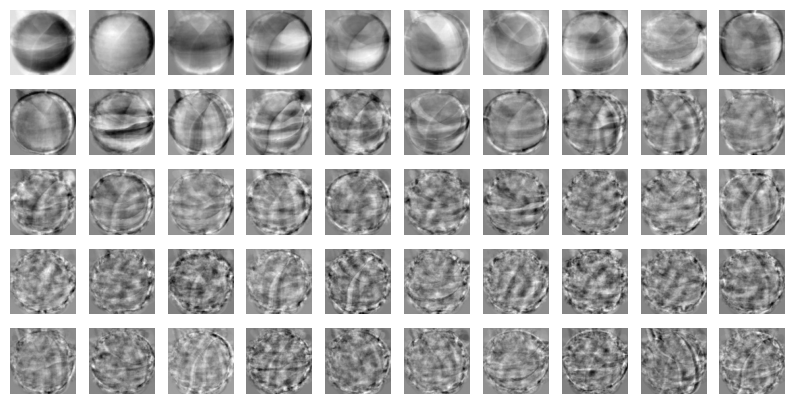

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
print(fruits_2d.shape) # 차원축소 전

(300, 10000)


In [10]:
fruits_pca = pca.transform(fruits_2d) # 차원축소

In [11]:
print(fruits_pca.shape) # 차원축소 후

(300, 50)


## 원본 데이터 재구성

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 축소된 차원 데이터를 원래 차원으로 복구
print(fruits_inverse.shape)

(300, 10000)


In [29]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
# 각 이미지 1d array(10000) 를 2d array(100 * 00) 로 변환

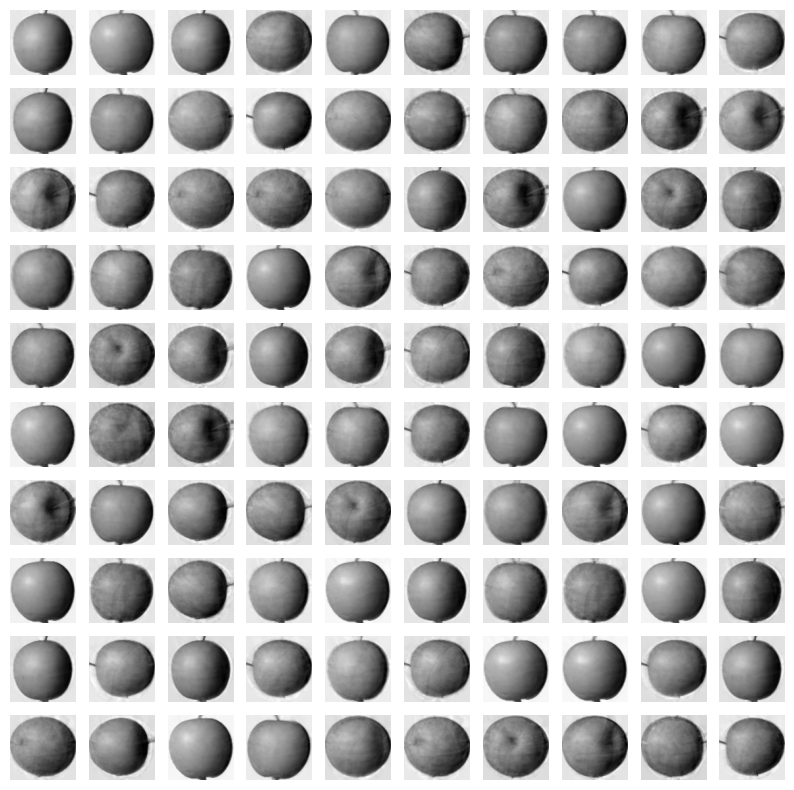

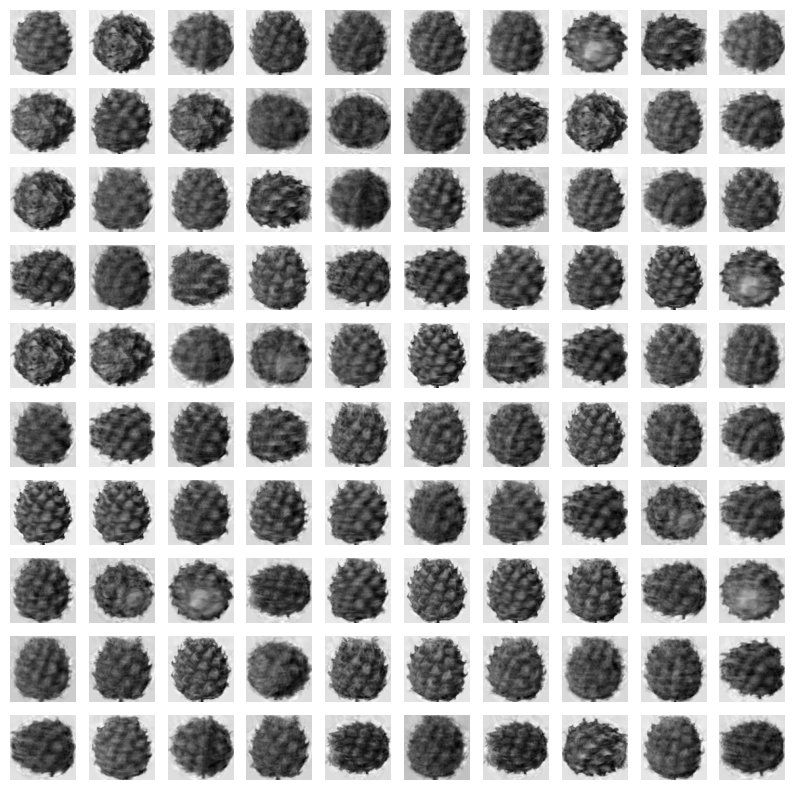

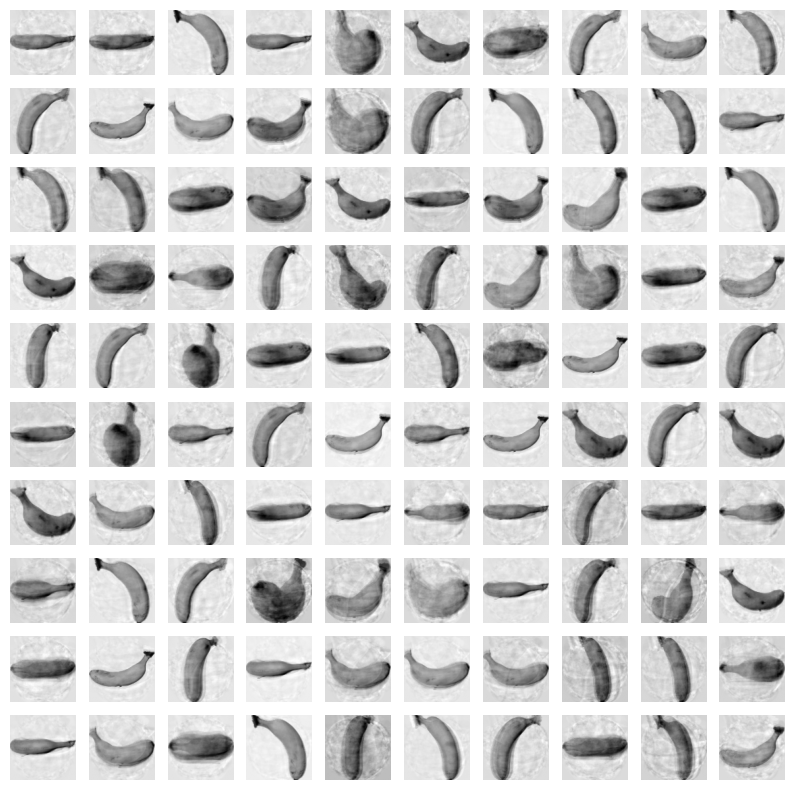

In [14]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [15]:
print(np.sum(pca.explained_variance_ratio_))
# 이미지 차원 축소시 이미지를 설명하는 비율.
# 10000 차원의 이미지를 50 차원으로 줄였지만 이미지를 92% 표현 가능

0.9215230430224405


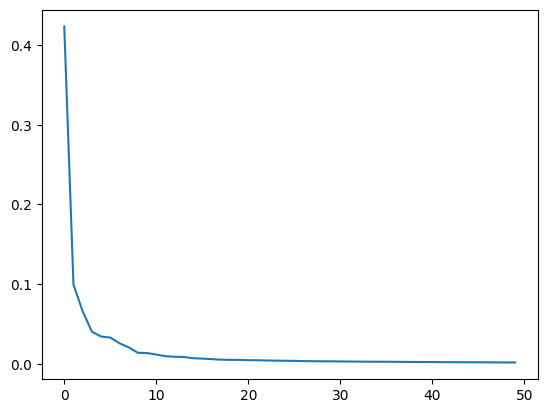

In [16]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
# 앞에 있는 차원(0~10)에서 대부분의 이미지 설명가능.
# 10 차원 이상부터는 0% 에 가까운 비율로 이미지를 설명하기때문에 의미없어보임.

## 다른 알고리즘과 함께 사용하기

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [30]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
print(target) # target 데이터 생성

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
# 로지스틱 회귀(LogisticRegression)를 사용하여 교차검증(cross_validate)을 실행해봄.

In [19]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.666034746170044


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.07771201133728027


In [ ]:
# 원래 데이터를 가지고 수행했을때 1.666 time 이 걸렸고
# 축소된 차원 데이터를 가지고 훈련을 수행했을때 0.077 time 이 걸림. 거의 22배 이상 빠름.
# 이미지의 차원이 축소되었지만 test_score 는 동일하게 측정됨.

In [21]:
pca = PCA(n_components=0.5)
# 0.5 개의 차원을 쓰겠다는 의미가 아님.
# 이미지 의 50% 만 표현하게끔 차원 축소 하겠다는 의미
pca.fit(fruits_2d) # 주성분 분석 수행 - 차원 축 계산

PCA(n_components=0.5)

In [22]:
print(pca.n_components_) # 2개의 차원으로 50% 이상의 이미지 표현이 가능

2


In [23]:
fruits_pca = pca.transform(fruits_2d) # 차원 축소진행
print(fruits_pca.shape)

(300, 2)


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 2개 차원으로 99%의 교차검증 테스트 점수를 얻음.
# 교차검증 시간은 0.041 걸림

0.99
0.041660308837890625


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
# 2개 차원으로 축소된 샘플 데이터를 k평균 군집 학습모델에 훈련시킴.

KMeans(n_clusters=3, random_state=42)

In [26]:
print(np.unique(km.labels_, return_counts=True))
# 각 군집(클러스터)별 개수를 확인

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


In [34]:
print(fruits[km.labels_ == 0].shape)
print(fruits[km.labels_ == 1].shape)
print(fruits[km.labels_ == 2].shape)

(110, 100, 100)
(99, 100, 100)
(91, 100, 100)


In [ ]:
# 각 label 별로 이미지를 출력함.

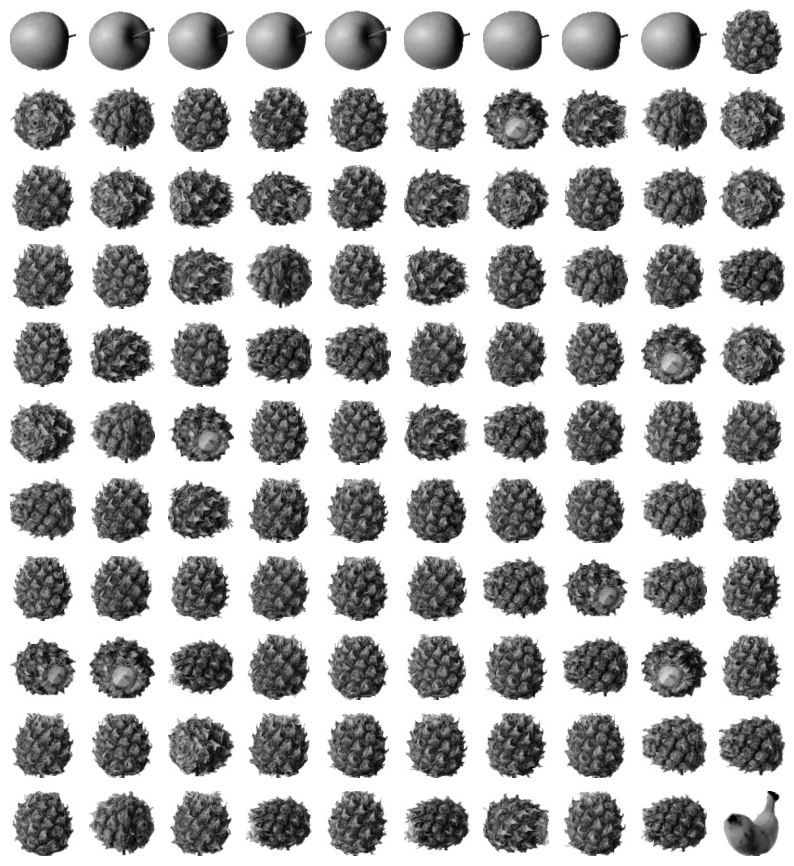

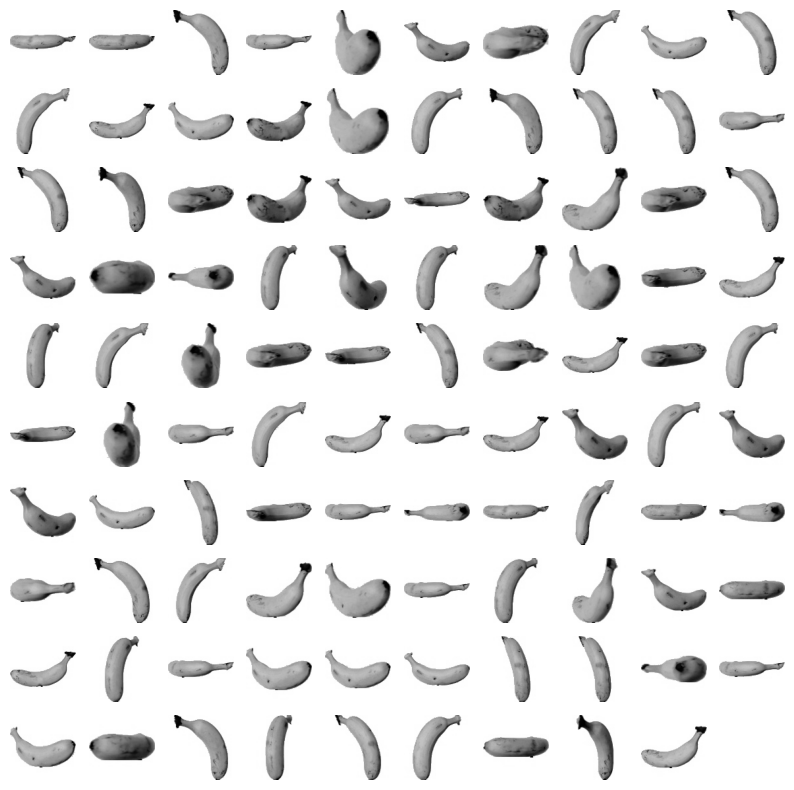

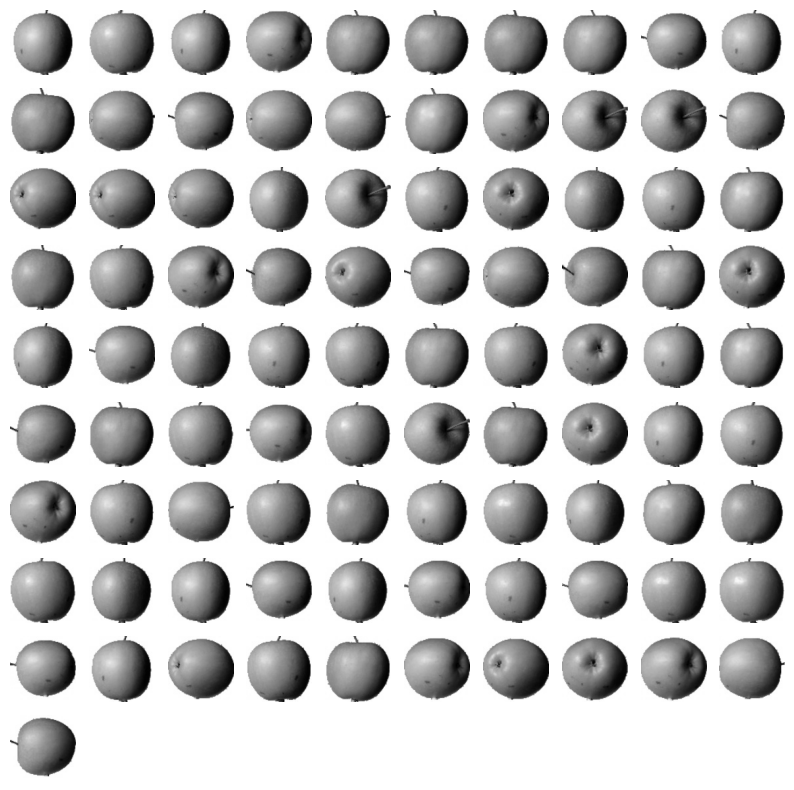

In [35]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

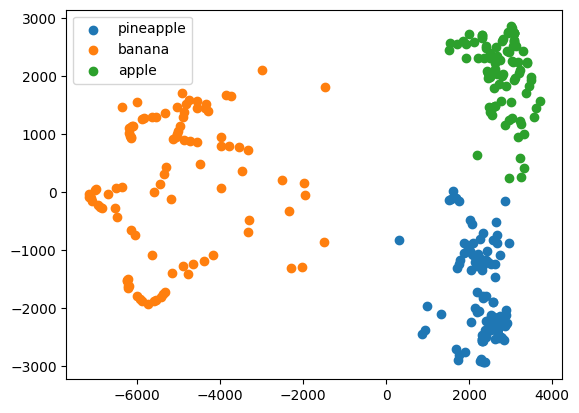

In [28]:
# 이미지 종류별 군집을 확인하기 위해 pyplot 생성
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()